# Sharpe

### About Sharpe
The Sharpe Ratio is a method to evaluate an asset's return in relation to it's risk. It is doing so by dividing the "exess return" by it's standard deviation. The "exess return" is the difference of the average return to the one of a "risk free" asses (such as US Government Bonds).

<img src="https://www.myaccountingcourse.com/wp-content/uploads/2017/10/sharpe-ratio-formula.jpg" width="750">

The below chart illustrates an example.

<img src="http://www.marottaonmoney.com/wp-content/uploads/2017/09/chile-sharpe.jpg" width="750">


### Objective
The goal is to make use of the Sharpe Ratio to improve the balace of a portfolio.
General guiding principles:
- The higher the Sharpe ratio, the better
- Rule of thumb: Sharpe Ratio < 0 => Not a good investment
- Rule of thumb: Sharpe Ratio >= 0 < 1 => Potentially a good investment
- Rule of thumb: Sharpe Ratio >= 1 => A good investment


### Approach
1. Import libraries
2. Data and data preparation
3. Exploratory data analysis
4. Calculating the Sharpe Ratio
5. Conclusion

## 1. Importing Libraries

In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Data
The Pandas Datareader Library is used to collect data from the internet.

In [2]:
tickers = ['XIC.TO', '^GSPC', 'SHOP', 'TSLA', 'VFV.TO', 'VDY.TO', 'HXQ.TO', 'XMH.TO', 'ZFL.TO']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="d")

df_stocks = df_stocks['Adj Close']

df_stocks

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,21.078621,2506.850098,138.449997,66.559998,57.912563,26.294300,12.005000,15.701625,15.984072
2019-01-02,21.087866,2510.030029,137.600006,62.023998,57.941288,26.478363,12.055000,15.740880,16.131481
2019-01-03,20.875141,2447.889893,129.789993,60.071999,56.025875,26.329357,11.600000,15.593674,16.352585
2019-01-04,21.217354,2531.939941,138.059998,63.537998,57.644398,26.688711,12.007500,16.094164,16.168331
2019-01-07,21.319094,2549.689941,144.389999,66.991997,57.606094,26.758831,12.062500,16.251181,16.094629
...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,NaN,NaN,NaN,107.399185,42.889011,59.110001,25.882492,17.817001
2021-12-27,NaN,4791.189941,1400.589966,1093.939941,NaN,NaN,NaN,NaN,NaN
2021-12-28,NaN,4786.350098,1375.619995,1088.469971,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking how many missing NaN
df_stocks.isna().sum()

Symbols
XIC.TO    16
^GSPC     13
SHOP      13
TSLA      13
VFV.TO    16
VDY.TO    16
HXQ.TO    16
XMH.TO    16
ZFL.TO    16
dtype: int64

In [4]:
# Checking if there are double-dates (divident stocks might show date a second time for the divident value)
print(df_stocks.index.has_duplicates)
print(df_stocks.index.nunique())
print(len(df_stocks))

False
770
770


In [5]:
# No duplicated dates
# 1.9% NaN for specific stocks; it is not a big impact to fill these gaps and certainly stem from days where certain stock markets were closed and others not.
df_stocks.fillna(method="ffill", inplace=True)
df_stocks

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,21.078621,2506.850098,138.449997,66.559998,57.912563,26.294300,12.005000,15.701625,15.984072
2019-01-02,21.087866,2510.030029,137.600006,62.023998,57.941288,26.478363,12.055000,15.740880,16.131481
2019-01-03,20.875141,2447.889893,129.789993,60.071999,56.025875,26.329357,11.600000,15.593674,16.352585
2019-01-04,21.217354,2531.939941,138.059998,63.537998,57.644398,26.688711,12.007500,16.094164,16.168331
2019-01-07,21.319094,2549.689941,144.389999,66.991997,57.606094,26.758831,12.062500,16.251181,16.094629
...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,4725.790039,1439.329956,1067.000000,107.399185,42.889011,59.110001,25.882492,17.817001
2021-12-27,33.737690,4791.189941,1400.589966,1093.939941,107.399185,42.889011,59.110001,25.882492,17.817001
2021-12-28,33.737690,4786.350098,1375.619995,1088.469971,107.399185,42.889011,59.110001,25.882492,17.817001


In [6]:
df_stocks.describe()

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,26.869739,3466.701412,810.497832,374.454381,78.533610,32.513670,24.246464,20.305905,18.002644
std,3.751674,639.484719,474.751971,331.232835,13.057270,4.946874,14.267909,3.696405,1.156823
min,17.139845,2237.399902,129.789993,35.793999,56.025875,20.500387,11.600000,11.086021,15.845888
25%,24.328178,2934.704956,329.677505,62.473501,67.421076,29.053023,14.584375,17.862125,17.142757
50%,25.613497,3275.359985,909.304993,232.828995,75.709255,31.170430,19.622499,18.785347,17.764736
75%,30.079419,4052.247559,1199.614960,669.634995,87.934902,36.618286,23.503749,24.692444,19.067123
max,34.937408,4793.060059,1690.599976,1229.910034,108.754997,43.248001,59.660000,27.395105,20.632423


In [7]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-12-31 to 2021-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XIC.TO  770 non-null    float64
 1   ^GSPC   770 non-null    float64
 2   SHOP    770 non-null    float64
 3   TSLA    770 non-null    float64
 4   VFV.TO  770 non-null    float64
 5   VDY.TO  770 non-null    float64
 6   HXQ.TO  770 non-null    float64
 7   XMH.TO  770 non-null    float64
 8   ZFL.TO  770 non-null    float64
dtypes: float64(9)
memory usage: 76.3 KB


## 3. Exploratory Data Analysis

Questions to investigate:
- Any major events?
- Correlations?
- Best performance, worst performance

In [8]:
# Let's create a function that can plot a dataset
def plot_that_chart(df, title):
    df.plot(title=title, figsize=(20, 7))
    plt.grid()

    plt.show();

### Trends

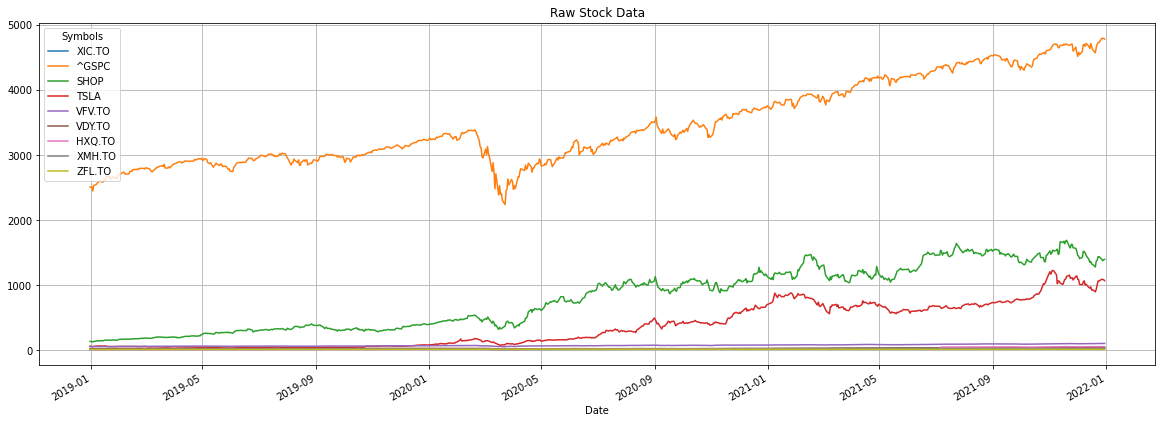

In [9]:
plot_that_chart(df_stocks, 'Raw Stock Data')

The chart is dominated by the Index, S&P 500. To get a clearer picture, the data will be normalized.

In [10]:
# Scaling to first closing values
df_stocks_normalized = df_stocks / df_stocks.iloc[0]
df_stocks_normalized

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.000439,1.001268,0.993861,0.931851,1.000496,1.007000,1.004165,1.002500,1.009222
2019-01-03,0.990347,0.976480,0.937450,0.902524,0.967422,1.001333,0.966264,0.993125,1.023055
2019-01-04,1.006582,1.010009,0.997183,0.954597,0.995369,1.015000,1.000208,1.025000,1.011528
2019-01-07,1.011408,1.017089,1.042904,1.006490,0.994708,1.017667,1.004790,1.035000,1.006917
...,...,...,...,...,...,...,...,...,...
2021-12-24,1.600564,1.885151,10.396027,16.030650,1.854506,1.631114,4.923782,1.648396,1.114672
2021-12-27,1.600564,1.911239,10.116215,16.435396,1.854506,1.631114,4.923782,1.648396,1.114672
2021-12-28,1.600564,1.909308,9.935862,16.353215,1.854506,1.631114,4.923782,1.648396,1.114672


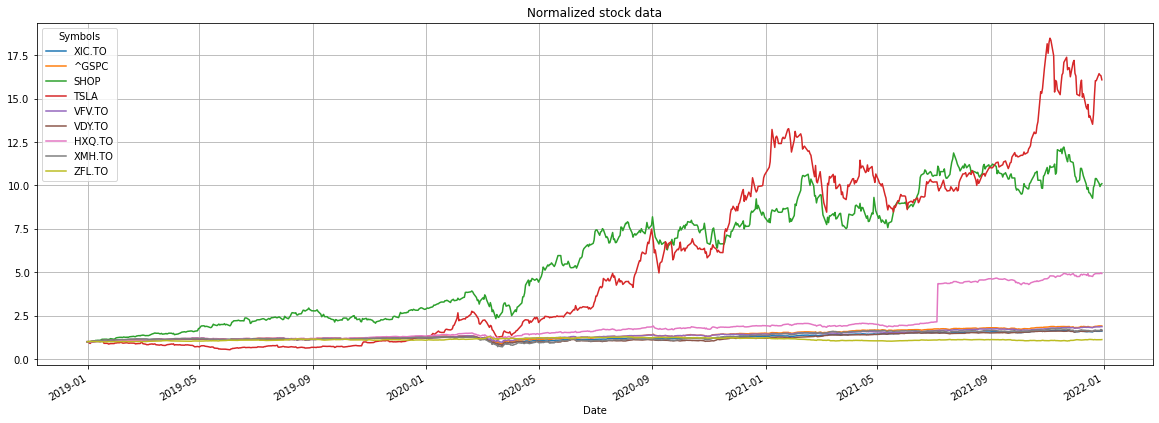

In [11]:
# Plot the normalized stock data
plot_that_chart(df_stocks_normalized, 'Normalized stock data')

The above chart shows that Shopify and Tesla are the big winners over the observed time period. There are two major peaks, followed by drops. HXQ shows a significant step approximately in July 2021. In order to see if the rest of the market followed the same trend these three stocks will to be removed from the chart.

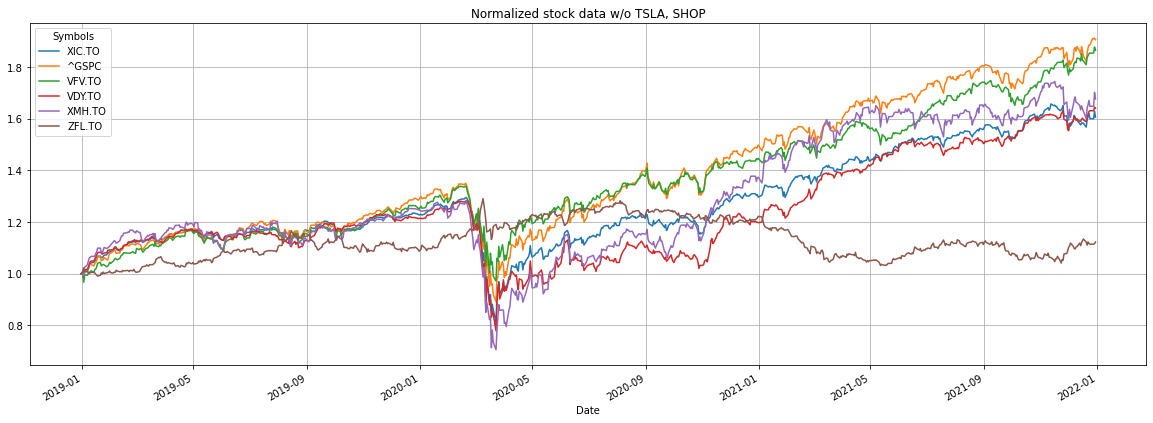

In [12]:
plot_that_chart(df_stocks_normalized.drop(['TSLA', 'SHOP', 'HXQ.TO'], axis=1), 'Normalized stock data w/o TSLA, SHOP')

Interestingly, we don't see the observed peaks and valleys of TSLA and SHOP in the rest of the listed shares. ZFL shows a trend that seems to be developing independent from the market. This may be the case because Real Estate is a completely diverent market sector. There is a major drop in April 2021.

### Correlations
We would like to see if daily returns of stocks correlate to each other.

In [13]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100
    #x = np.sum(np.log(df/df.shift()), axis=1)

    x.iloc[0] = 0

    return x

In [14]:
# Generate data table with daily returns
df_stock_returns = calc_return(df_stocks)
df_stock_returns

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.043859,0.126850,-0.613933,-6.814903,0.049600,0.700011,0.416495,0.250007,0.922227
2019-01-03,-1.008754,-2.475673,-5.675881,-3.147168,-3.305782,-0.562746,-3.774367,-0.935185,1.370635
2019-01-04,1.639331,3.433571,6.371835,5.769742,2.888884,1.364842,3.512925,3.209572,-1.126756
2019-01-07,0.479513,0.701043,4.584964,5.436115,-0.066448,0.262732,0.458050,0.975613,-0.455841
...,...,...,...,...,...,...,...,...,...
2021-12-24,-1.241806,0.000000,0.000000,0.000000,0.139435,0.163014,0.067718,-1.372576,-0.223453
2021-12-27,0.000000,1.383894,-2.691529,2.524830,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-28,0.000000,-0.101015,-1.782818,-0.500025,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

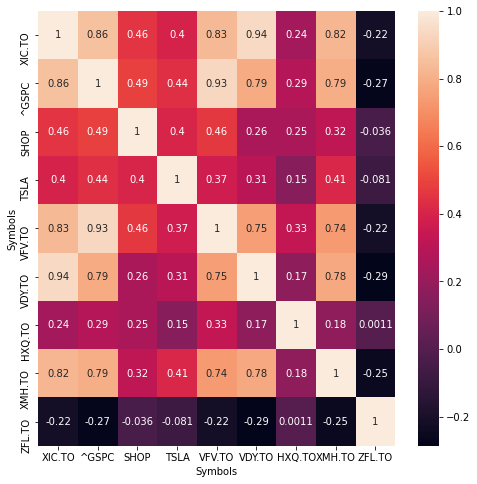

In [15]:
# Visualize correlations
plt.figure(figsize=(8, 8))
sns.heatmap(df_stock_returns.corr(), annot=True)

The above chart confirms our observation of the trends. ZFL follows an independent path. SHOP and TSLA are also not highly correlated with the rest of the stocks and the market. A very high correlation exist between VFV and the S&P500 (^GSPC) which is no suprise as VFV is an ETF that tracks the S&P500. The highest correlation exist between VFV and XIC. Also this is no surprise as both track the index and compile only this top companies. In light of portfolio diversification it can be considered to only keep one of the two ETSs.

### EDA conclusions
- The trend is generally upwards with some peaks and valleys along the way
- ZFL (Real Estates) is very unrelated to the rest of the listed stocks
- TSLA and SHOP show very dynamic developments that separates them from the rest of the field
- There are times of steep falls for TSLA and SHOP, but in conclusion, these are the stocks with the highest gains in the obervation time period
- A strong correlations exist between the ETFs that track the index and the S&P500 (^GSPC)

## 4. Calculating the Sharpe Ratio

### Obtaining the risk free rate rf
Mostly, the rf rate is extracted from the [US government tresury bond](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=billratesAll).

The value can be calculated or looked up online, but I will take 0 for simplicity.

In [112]:
# 3 year treasury yield
rf = 0

This rf is already the yearly value. Our current data table contains the daily returns. We need to translate these to yearly values. There are 252 trading days in a year.

In [125]:
def sharpe_calculation(stock):
    '''Function to calculate the Sharpe Ratio
    Input: Range of a stock's daily returns
    Output: Sharpe Ratio'''

    # Compound Annual Growth Rate
    cagr = ((df_stocks[stock].iloc[-1] / df_stocks[stock].iloc[0]) ** (1 / 3) - 1) * 100

    # Annualized volatility
    std_yrly = df_stock_returns[stock].std() * np.sqrt(252)

    return (cagr - rf) / std_yrly

In [126]:
# Let's test with TSLA
sharpe_calculation('TSLA')

2.29142591396146

In [127]:
# OK, let's now calculate all
for i in df_stock_returns.columns:
    if i != '^GSPC':
        print('Sharpe Ratio for {}: {:2.4}'.format(i, sharpe_calculation(i)))

Sharpe Ratio for XIC.TO: 0.8552
Sharpe Ratio for SHOP: 2.187
Sharpe Ratio for TSLA: 2.291
Sharpe Ratio for VFV.TO: 1.136
Sharpe Ratio for VDY.TO: 0.7579
Sharpe Ratio for HXQ.TO: 1.121
Sharpe Ratio for XMH.TO: 0.7043
Sharpe Ratio for ZFL.TO: 0.3429


## 5. Conclusion
The findings in this analysis seem consistly point in the same direction. The TSLA and SHOP stocks are very risky due their volatility. But these two assets outperform the rest of the market by far. Investors who whould have taken the risk in this period would have been rewarded with big wins. The Sharpe Ratio for TSLA and SHOP indicate the same idea: Based on the historical data an investment is by far worth the risk.
ZFL seem to linger on the lower end of the Sharpe Ratio, but still an option to buy. As this stock is in a different sector it is recommended to hold on to it for the sake of portfolio diversification.